#### Multiple Linear Regression



In [1]:
# import libraries

import os
import sys  
import time
import argparse
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Upload the data frame

df = pd.read_csv('boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# now MEDV is the target variable and replacing the column name with 'price'
df.rename(columns ={'MEDV': 'price'},inplace=True)
# check the data types of the columns
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
# describe the statisticals data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

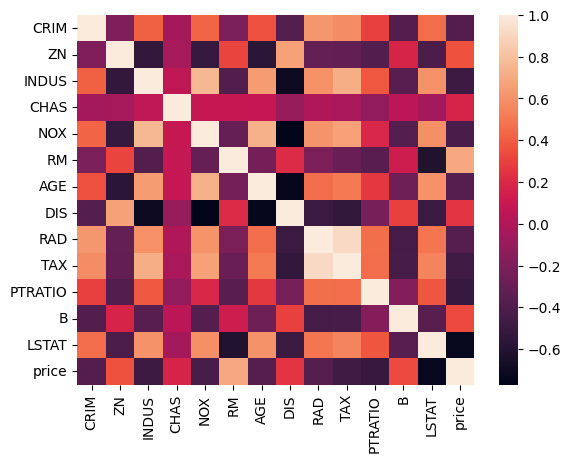

In [13]:
# Correlation between Different features
sns.heatmap(df.corr())

C:\Users\Vivek\AppData\Local\Temp\ipykernel_11568\2892315085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

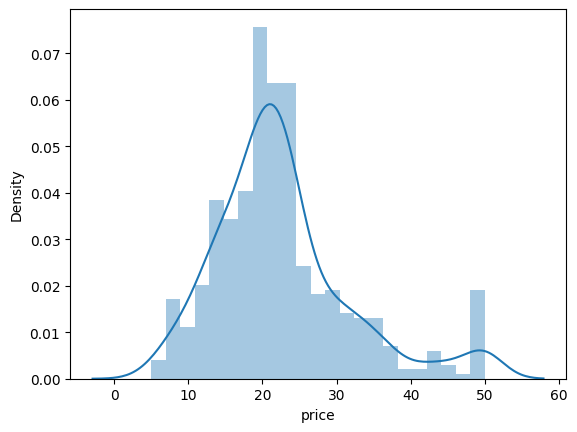

In [22]:
# Distributing of Price Column
sns.distplot(df['price'])

In [23]:
# Creating Predictor variable 'X' and Target Variable 'y'

X = df.drop('price',axis=1)
y = df['price']

In [24]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [25]:
# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


In [27]:
from sklearn.linear_model import LinearRegression
# Creating a Linear Regression model
model = LinearRegression()
# Fitting the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# print the intercept
print(model.intercept_)


25.469528442763036


In [34]:
coeffecients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coeffecients

,Coefficient
CRIM,-0.102245
ZN,0.031104
INDUS,0.014369
CHAS,1.659646
NOX,-15.869391
RM,5.032224
AGE,-0.000716
DIS,-1.313538
RAD,0.255945
TAX,-0.012337


In [ ]:
pred = model.predict(X_test) 
pred

array([ 9.70536163e+00,  2.52526846e+01,  1.99563787e+01,  2.78890172e+01,
        2.22739530e+01,  2.32476003e+01,  1.62794573e+01,  1.69545473e+01,
        1.29304677e+01,  2.49423296e+01,  1.44246339e+01,  2.86653627e+01,
        1.76944262e+01,  3.46031656e+01,  1.85769591e+01,  1.35355785e+01,
        1.40027050e+01,  2.86569561e+01,  2.24340994e+01,  2.41506896e+01,
        2.40056244e+01,  3.72997269e+01,  3.06816250e+01,  1.93607196e+01,
        2.05776606e+01,  1.70641899e+01,  1.15241219e+01,  2.40849661e+01,
        3.10697041e+01,  2.36199284e+01,  2.10421914e+01,  5.88252060e+00,
        3.03053885e+01,  3.63167383e+01,  2.16908598e+01,  3.23510449e+01,
        3.46814402e+01,  2.07641740e+01,  2.85939847e+01,  4.01152089e+01,
        3.98810686e+01,  1.27048376e+01,  2.06620305e+01,  2.52423966e+01,
        2.08504892e+00,  1.46209833e+01,  2.22242105e+01,  3.48031883e+01,
        2.60939130e+01,  2.16408781e+01,  3.03883691e+01,  2.52756205e+01,
        1.50906276e+01,  

Text(0, 0.5, 'Predicted Prices')

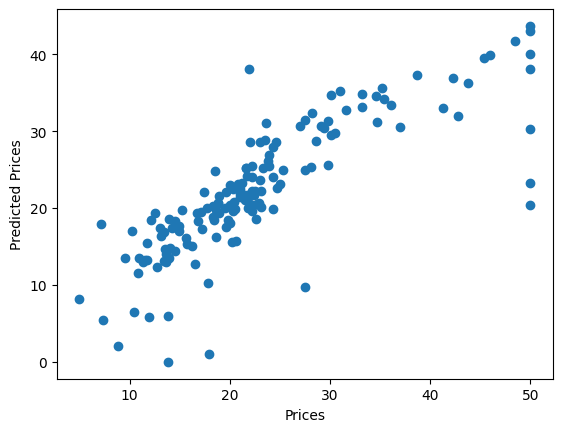

In [39]:
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")

In [40]:
from sklearn import metrics
# Calculating the Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,pred)))


MAE: 3.678977534499425
MSE: 33.868033996670036
RMSE: 5.819624901715748


In [41]:
print("Rsquare=",metrics.r2_score(y_test,pred))

Rsquare= 0.6685538790447983


#### Polynomial Regression